<a href="https://colab.research.google.com/github/jiuvvi/QR_take_home_kernel/blob/main/QR_take_home_kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# General data preparation
In this section, we will prepare the data for the analysis, including the following steps:
1. Download the data from the GitHub repository
2. Unzip the data
3. Define the extraction folder
4. Extract the data
5. fill NaN values with 0
6. Convert the is in trading universe to 1 and 0



In [1]:
!git clone https://github.com/ktt2023/quant_projects
from google.colab import drive


Cloning into 'quant_projects'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 26 (delta 0), reused 9 (delta 0), pack-reused 17
Receiving objects: 100% (26/26), 461.07 MiB | 16.26 MiB/s, done.
Updating files: 100% (16/16), done.


In [ ]:
import zipfile
import os

zip_file_name1 = '/content/quant_projects/risk_factors_1.zip'
zip_file_name2 = '/content/quant_projects/risk_factors_2.zip'
zip_file_name3 = '/content/quant_projects/security_reference_data_w_ret1d_1.zip'
zip_file_name4 = '/content/quant_projects/security_reference_data_w_ret1d_2.zip'
zip_file_name5 = '/content/quant_projects/data_set_8.zip'
zip_file_name6 = '/content/quant_projects/data_set_9.zip'

# Define the extraction folder
extract_folder = '/content/quant_projects'

with zipfile.ZipFile(zip_file_name1, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)
with zipfile.ZipFile(zip_file_name2, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

with zipfile.ZipFile(zip_file_name3, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)
with zipfile.ZipFile(zip_file_name4, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)
with zipfile.ZipFile(zip_file_name5, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)
with zipfile.ZipFile(zip_file_name6, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)


#print(f"File {zip_file_name} has been successfully extracted to {extract_folder}.")


In [ ]:
!rm {zip_file_name1}
!rm {zip_file_name2}
!rm {zip_file_name3}
!rm {zip_file_name4}
!rm {zip_file_name5}
!rm {zip_file_name6}

In [ ]:
import os
import pandas as pd



# Get a list of all files in the specified directory
files = [file for file in os.listdir(extract_folder) if os.path.isfile(os.path.join(extract_folder, file))]

# Create a dictionary to store DataFrames
dataframes = {}

# Iterate through each file and load into a DataFrame
for file in files:
    file_path = os.path.join(extract_folder, file)

    try:
        # For CSV files:
        dataframes[file] = pd.read_csv(file_path)


        print(f"Successfully loaded {file} into a DataFrame.")
    except Exception as e:
        print(f"Error loading {file}: {e}")



Successfully loaded data_set_1.csv into a DataFrame.
Successfully loaded security_reference_data_w_ret1d_2.csv into a DataFrame.
Successfully loaded data_set_9.csv into a DataFrame.
Successfully loaded data_set_7.csv into a DataFrame.
Successfully loaded data_set_6.csv into a DataFrame.
Successfully loaded security_reference_data_w_ret1d_1.csv into a DataFrame.
Successfully loaded data_set_11.csv into a DataFrame.
Successfully loaded data_set_4.csv into a DataFrame.
Successfully loaded data_set_3.csv into a DataFrame.
Successfully loaded risk_factors_2.csv into a DataFrame.
Successfully loaded data_set_5.csv into a DataFrame.
Successfully loaded data_set_2.csv into a DataFrame.
Successfully loaded risk_factors_1.csv into a DataFrame.
Successfully loaded README.md into a DataFrame.
Successfully loaded data_set_10.csv into a DataFrame.
Successfully loaded data_set_8.csv into a DataFrame.


In [ ]:
del dataframes['README.md']


In [ ]:
merged_df = dataframes['data_set_1.csv']
merged_df = pd.merge(merged_df, dataframes['data_set_3.csv'] ,on=['data_date','security_id'], how='outer')
print(merged_df[(merged_df['data_date']==20100104) & (merged_df['security_id']==647001)])
print(merged_df)
merged_df = pd.merge(merged_df, dataframes['data_set_1.csv'] ,on=['data_date','security_id'], how='outer')
print(merged_df)
print(merged_df[(merged_df['data_date']==20100104) & (merged_df['security_id']==647001)])
print(merged_df)
merged_df = pd.merge(merged_df, dataframes['data_set_2.csv'] ,on=['data_date','security_id'], how='outer')
print(merged_df[(merged_df['data_date']==20100104) & (merged_df['security_id']==647001)])
print(merged_df)
merged_df = merged_df.drop_duplicates()

print(merged_df)

   data_date  security_id     d1        d3
0   20100104       647001  3.453  0.079633
1   20100104       647001  3.453  0.079633
        data_date  security_id     d1        d3
0        20100104       647001  3.453  0.079633
1        20100104       647001  3.453  0.079633
2        20100104       696801  1.582       NaN
3        20100104       696801  1.582       NaN
4        20100104       702901    NaN       NaN
...           ...          ...    ...       ...
254527   20171227   1117183801  0.312       NaN
254528   20171228       647001 -0.050 -0.034732
254529   20171228       647001 -0.050 -0.034732
254530   20171229      2968101  0.894 -0.000221
254531   20171229      2968101  0.894 -0.000221

[254532 rows x 4 columns]
        data_date  security_id   d1_x        d3   d1_y
0        20100104       647001  3.453  0.079633  3.453
1        20100104       647001  3.453  0.079633  3.453
2        20100104       696801  1.582       NaN  1.582
3        20100104       696801  1.582       NaN 

In [ ]:
merged_df = dataframes['data_set_1.csv']

  # Start with the first DataFrame
print(merged_df)
l=len(merged_df)
for i in range(2,12):
    local_df = dataframes['data_set_'+str(i)+'.csv']
    grouped_df = local_df.groupby(['data_date','security_id']).mean()
    del local_df['d'+str(i)]
    local_df=pd.merge(local_df, grouped_df ,on=['data_date','security_id'], how='inner')
    merged_df = pd.merge(merged_df, local_df ,on=['data_date','security_id'], how='outer')  # Adjust 'on' and 'how' based on your requirements
    merged_df = merged_df.drop_duplicates()
    print(len(merged_df)/l)

    #filtered_rows = df[(df['Age'] > 25) & (df['City'] == 'New York')]


# Display the merged DataFrame
#print(merged_df)

        data_date  security_id       d1
0        20100104       647001   3.4530
1        20100104       696801   1.5820
2        20100104       702901      NaN
3        20100104      1178501      NaN
4        20100104      1323901  -0.9449
...           ...          ...      ...
127261   20171226      3538501 -23.2240
127262   20171226      4943501  -9.9380
127263   20171227   1117183801   0.3120
127264   20171228       647001  -0.0500
127265   20171229      2968101   0.8940

[127266 rows x 3 columns]
1.0
1.0
1.0
1.0
1.0
1.0
65.60144893372936
70.18059811732905
70.1862712743388
70.1862712743388


In [ ]:
print(len(merged_df))
df_real = pd.merge(df_set_2013 ,df_real ,on=['security_id'], how='left')
print(len(df_real))
print(merged_df[(merged_df['data_date']==20100104) & (merged_df['security_id']==647001)])
print(merged_df[merged_df["data_date"]==20100104])
print(merged_df[merged_df["security_id"]==647001])

8932326
4044117
   data_date  security_id     d1     d2        d3      d4        d5     d6  \
0   20100104       647001  3.453  3.936  0.079633  5.9847  0.037713 -0.066   

      d7      d8    d9  d10  d11  
0 -0.174  8172.0  2.19  NaN  NaN  
         data_date  security_id      d1      d2        d3      d4        d5  \
0         20100104       647001  3.4530  3.9360  0.079633  5.9847  0.037713   
1         20100104       696801  1.5820  2.2950       NaN -2.4456       NaN   
2         20100104       702901     NaN     NaN       NaN -4.9255       NaN   
3         20100104      1178501     NaN     NaN       NaN     NaN       NaN   
4         20100104      1323901 -0.9449  0.7976       NaN -2.0536       NaN   
...            ...          ...     ...     ...       ...     ...       ...   
8349188   20100104   1092376601     NaN     NaN       NaN     NaN       NaN   
8349189   20100104   1092440201     NaN     NaN       NaN     NaN       NaN   
8349190   20100104   1092451201     NaN     Na

In [ ]:
file_name1='risk_factors_1.csv'
file_name2='risk_factors_2.csv'
file_name3='security_reference_data_w_ret1d_1.csv'
file_name4='security_reference_data_w_ret1d_2.csv'
def concat_df(file_name1, file_name2):
    df1=dataframes[file_name1]
    print(len(df1["security_id"].unique()))
    df2=dataframes[file_name2]
    print(len(df2["security_id"].unique()))
    result_df = pd.concat([df1, df2], ignore_index=True)

    # Display the result
    print(result_df)
    return result_df
risk_df=concat_df(file_name1, file_name2)
sec_ret_df=concat_df(file_name3, file_name4)

res_df = pd.merge(risk_df, sec_ret_df ,on=['data_date','security_id'], how='outer')

df_real = pd.merge(res_df, merged_df ,on=['data_date','security_id'], how='left')
print(df_real)

6582
5953
         data_date  security_id    rf1    rf2    rf3    rf4    rf5    rf6
0         20100104      5311701  0.284 -0.500  1.789  2.962 -0.435 -0.314
1         20100104      3780701  1.890 -1.330 -0.208  0.775 -0.803 -0.576
2         20100104      2297301  0.012  0.217  0.285 -0.151  0.883  0.127
3         20100104        83501  1.185  1.195  2.677 -1.485 -1.236 -1.341
4         20100104      4159901 -0.335 -2.917  2.548  1.691  0.394 -2.290
...            ...          ...    ...    ...    ...    ...    ...    ...
8800010   20171229   1114827901  0.322  0.118 -1.623  0.716 -0.141  0.172
8800011   20171229   1107343201 -0.690 -0.662 -2.213  0.364 -0.186 -0.953
8800012   20171229   1118042001  0.322  0.081  2.433  0.872 -0.147  0.193
8800013   20171229   1117917701 -0.466 -1.404 -2.107  1.016 -1.579 -1.346
8800014   20171229   1115398701 -0.062 -0.123 -2.239  0.123 -0.088 -0.414

[8800015 rows x 8 columns]
6582
5953
         data_date  security_id  close_price     volume  group_i

In [ ]:
#df_filtered = df_real.dropna(thresh=20)
#print(df_real["security_id"]==5311701)
df_real.fillna(0, inplace=True)
a=df_real.groupby(['security_id']).mean()

sorted_df = a.sort_values(by='ret1d')


print(sorted_df.head(1000))
print(sorted_df.tail(1000))
print('next')
'''
test=df_real[df_real["security_id"]==4159901]
print(test)
df_filtered=test'''
df_real['Group_Counts'] = df_real.groupby('security_id')['security_id'].transform('count')

#print(b)





                 data_date       rf1       rf2       rf3       rf4       rf5  \
security_id                                                                    
7.470010e+05  2.013567e+07  0.763597 -1.344676  0.995555 -1.049213 -0.459316   
1.456701e+06  2.013567e+07 -0.299654 -0.728894  0.656016  1.212149 -1.443542   
2.000701e+06  2.013567e+07 -0.211542 -1.334976  1.351462  2.565140  1.176357   
7.081601e+06  2.013567e+07  0.480782 -1.184071  1.002976 -0.097014  0.658538   
6.886801e+06  2.013567e+07  0.626552 -1.126969  1.964983 -0.356968 -0.331577   
...                    ...       ...       ...       ...       ...       ...   
2.996401e+06  2.013567e+07 -0.151315 -0.030178 -0.808023 -0.286361 -0.338866   
1.092212e+09  2.013567e+07  0.136980 -0.276390  0.687306  0.539728  0.028842   
8.161601e+06  2.013567e+07 -1.306507  0.032475 -0.529188  0.754665 -0.855216   
1.843401e+06  2.013567e+07 -0.136730 -0.005528  0.563601  0.097281 -0.218381   
7.454801e+06  2.013567e+07  1.085502  0.

<ipython-input-11-6df01c2d695e>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a=df_real.groupby(['security_id']).mean()


In [ ]:
sorted_df = df_real.sort_values(by='Group_Counts', ascending=False)

Set_2013=sorted_df[sorted_df['Group_Counts']==2013]
print(Set_2013['security_id'])


0          5311701
4704996    2561701
4705023    2660601
4705020    2651301
4705017    2644901
            ...   
1409657    1276201
2544070    8386601
1344895    2453601
84841      7326501
1401684    7681501
Name: security_id, Length: 4044117, dtype: int64


In [ ]:
set_2013=Set_2013['security_id'].unique()
print(set_2013)
print(len(set_2013))

[5311701 2561701 2660601 ... 6852401 6839801 1894401]
2009


In [ ]:
df_real.fillna(0, inplace=True)
print(df_real.head())
df_real.columns
print(len(df_real))
df_real['in_trading_universe'] = df_real['in_trading_universe'].replace({'N': 0, 'Y': 1})

   security_id  data_date    rf1    rf2    rf3    rf4    rf5    rf6  \
0    5311701.0   20100104  0.284 -0.500  1.789  2.962 -0.435 -0.314   
1    5311701.0   20100105  0.286 -0.531  1.828  2.951 -0.434 -0.313   
2    5311701.0   20100106  0.286 -0.630  1.845  2.932 -0.432 -0.315   
3    5311701.0   20100107  0.306 -0.641  1.776  2.947 -0.431 -0.315   
4    5311701.0   20100108  0.305 -0.755  1.769  2.944 -0.432 -0.314   

   close_price   volume  ...   d3   d4   d5   d6   d7       d8   d9  d10  d11  \
0        34.72  12061.0  ...  0.0  0.0  0.0  0.0  0.0  18358.0  0.0  0.0  0.0   
1        36.46  35907.0  ...  0.0  0.0  0.0  0.0  0.0  26841.0  0.0  0.0  0.0   
2        37.58  16869.0  ...  0.0  0.0  0.0  0.0  0.0  13723.0  0.0  0.0  0.0   
3        38.08  32255.0  ...  0.0  0.0  0.0  0.0  0.0  37563.0  0.0  0.0  0.0   
4        38.42   7506.0  ...  0.0  0.0  0.0  0.0  0.0   8495.0  0.0  0.0  0.0   

   Group_Counts  
0          2013  
1          2013  
2          2013  
3          201

In [ ]:
df_real.columns
df_masked_50=df_real[(df_real['group_id']>50*10**6)&(df_real['group_id']<60*10**6)]
df_masked_50['security_id'].unique()
df_masked_50.drop(columns="group_id", inplace=True)
df_masked_50.drop(columns="close_price", inplace=True)
masked_50_set=df_masked_50['security_id'].unique()
print(df_masked_50)

#df_real.drop(columns="Group_Counts", inplace=True)

         security_id  data_date    rf1    rf2    rf3    rf4    rf5    rf6  \
32208      2522701.0   20100104 -0.999 -0.572 -0.201  0.296 -0.348  0.478   
32209      2522701.0   20100105 -1.009 -0.634 -0.207  0.311 -0.344  0.483   
32210      2522701.0   20100106 -1.013 -0.589 -0.201  0.296 -0.342  0.480   
32211      2522701.0   20100107 -1.017 -0.504 -0.241  0.308 -0.330  0.485   
32212      2522701.0   20100108 -1.021 -0.478 -0.202  0.328 -0.329  0.492   
...              ...        ...    ...    ...    ...    ...    ...    ...   
4038073    5517801.0   20171222 -1.027 -0.420  0.449 -0.265 -0.235  0.368   
4038074    5517801.0   20171226 -1.039 -0.506  0.837 -0.269 -0.236  0.358   
4038075    5517801.0   20171227 -1.037 -0.569  0.308 -0.265 -0.236  0.366   
4038076    5517801.0   20171228 -0.986 -0.677 -0.107 -0.280 -0.236  0.342   
4038077    5517801.0   20171229 -1.078 -0.663  0.023 -0.292 -0.236  0.348   

            volume  in_trading_universe  ...   d2   d3   d4   d5   d6   d7 

<ipython-input-48-2c71a5995ac0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_masked_50.drop(columns="group_id", inplace=True)
<ipython-input-48-2c71a5995ac0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_masked_50.drop(columns="close_price", inplace=True)


#load data/ save data

In [ ]:
import numpy as np


csv_file_path ='/content/quant_projects/data_2013_50_nn.csv'

# Save the NumPy array as a CSV file
np.savetxt(csv_file_path, data_nn.reshape(109,-1), delimiter=',')

print(f"CSV file saved at: {csv_file_path}")


CSV file saved at: /content/quant_projects/data_2013_50_nn.csv


In [3]:
import numpy as np

# Specify the file path of the CSV file

csv_file_path ='/content/quant_projects/data_2013_50_nn.csv'
# Load the CSV file into a NumPy array
loaded_array = np.loadtxt(csv_file_path, delimiter=',').reshape(109,2013,-1)
print(loaded_array.shape)
'''
# Display the loaded NumPy array
print("Loaded NumPy Array:")
print(loaded_array)

# Specify custom index and column names

custom_columns = ['security_id']

# Convert the NumPy array to a DataFrame with custom index and columns
df_set_2013 = pd.DataFrame(loaded_array, columns=custom_columns)

# Display the DataFrame with custom index and columns
print("\nDataFrame with Custom Index and Columns:")
print(df_set_2013)
'''


(109, 2013, 22)


'\n# Display the loaded NumPy array\nprint("Loaded NumPy Array:")\nprint(loaded_array)\n\n# Specify custom index and column names\n\ncustom_columns = [\'security_id\']\n\n# Convert the NumPy array to a DataFrame with custom index and columns\ndf_set_2013 = pd.DataFrame(loaded_array, columns=custom_columns)\n\n# Display the DataFrame with custom index and columns\nprint("\nDataFrame with Custom Index and Columns:")\nprint(df_set_2013)\n'

#traditional machine learning

##xgboost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = aaa.values

X =data[:-1, :].astype(float)
#X = np.delete(X, np.where(aaa.columns=="Group_Counts")[0], axis=1)
X = np.delete(X, np.where(aaa.columns=="ret1d")[0], axis=1)
#X = np.delete(X, np.where(aaa.columns=="close_price")[0], axis=1)
y=data[1:,10].astype(float)
print(y.shape,X.shape)
epoches=200
train_sharpe=np.zeros(epoches)
test_sharpe=np.zeros(epoches)
train_sharpe_select=np.zeros(epoches)
test_sharpe_select=np.zeros(epoches)

for i in range(epoches):
      print(f'Epoch {i+1}')

      # Split the data into training and testing sets
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

      # Create an XGBoost Regressor with GPU support
      xgb_regressor_gpu = xgb.XGBRegressor(objective='reg:squarederror',n_jobs=32,max_depth=2,n_estimators = 2, tree_method = "approx", device = "cpu")

      # Train the model
      xgb_regressor_gpu.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)


      # Make predictions on the test set
      y_pred_gpu = xgb_regressor_gpu.predict(X_test)

      y_pred_train = xgb_regressor_gpu.predict(X_train)

      model = LinearRegression()

      # Train the model on the training set
      model.fit(X_train, y_train)
      y_pred_gpu =(3*y_pred_gpu+1* model.predict(X_test))*0.25
      y_pred_train =(3*y_pred_train+1* model.predict(X_train))*0.25

      test_sharpe[i],train_sharpe[i]= sharpe(y_pred_gpu,y_test),sharpe(y_pred_train,y_train)


      feature_importances = xgb_regressor_gpu.feature_importances_
      '''
      # Print feature importances
      for i, importance in enumerate(feature_importances):
          print(f"Feature {i}: {importance}")
      '''
      # Select features based on importance
      threshold = np.mean(feature_importances)  # Set a threshold based on the criteria
      sfm = SelectFromModel(xgb_regressor_gpu, threshold=0.5*threshold)
      sfm.fit(X_train, y_train)

      # Transform the data to include only selected features
      X_train_selected = sfm.transform(X_train)
      X_test_selected = sfm.transform(X_test)

      # Print selected features
      selected_features = [f"Feature {i}" for i in range(X_train.shape[1]) if sfm.get_support()[i]]
      selected_features_list=[i for i in range(X_train.shape[1]) if sfm.get_support()[i]]
      print(f"Selected Features: {selected_features}")

      xgb_regressor_n= xgb.XGBRegressor(objective='reg:squarederror',n_jobs=32,max_depth=2,n_estimators =2, tree_method = "approx", device = "cpu")

      X_train_selected = sfm.transform(X_train)
      X_test_selected = sfm.transform(X_test)
      xgb_regressor_n.fit(X_train_selected, y_train, eval_set=[(X_test_selected, y_test)], verbose=False)


      # Make predictions on the test set
      y_pred = xgb_regressor_n.predict(X_test_selected)

      # Evaluate the model



      y_pred_train = xgb_regressor_n.predict(X_train_selected)
      # Evaluate the model

      lasso_model = Lasso(alpha=0.05)  # You can adjust the regularization strength with the 'alpha' parameter

      # Train the model on the training set
      lasso_model.fit(X_train, y_train)

      # Make predictions on the testing set
      y_pred = lasso_model.predict(X_test)



      nonzero_positions = np.nonzero(lasso_model.coef_)[0]
      print(nonzero_positions)
      X_train_selected=X_train[:,nonzero_positions]
      X_test_selected=X_test[:,nonzero_positions]

      model = LinearRegression()

      model.fit(X_train_selected, y_train)
      y_pred_train = (4*y_pred_train+0*model.predict(X_train_selected))*0.25
      y_pred = (4*y_pred+0*model.predict(X_test_selected))*0.25
      test_sharpe_select[i],train_sharpe_select[i]= sharpe(y_pred,y_test),sharpe(y_pred_train,y_train)


(232550,) (232550, 21)
Epoch 1
Selected Features: ['Feature 1', 'Feature 5']
[ 0  1  8 10 11 17 20]
Epoch 2
Selected Features: ['Feature 1', 'Feature 7']
[ 0  1  8 10 11 17 20]
Epoch 3
Selected Features: ['Feature 1', 'Feature 7']
[ 0  1  8 10 11 17 20]
Epoch 4
Selected Features: ['Feature 1', 'Feature 7']
[ 0  1  8 10 11 17 20]
Epoch 5
Selected Features: ['Feature 1', 'Feature 2']
[ 0  1  8 10 11 17 20]
Epoch 6
Selected Features: ['Feature 1', 'Feature 3', 'Feature 18']
[ 0  1  8 10 11 17 20]
Epoch 7
Selected Features: ['Feature 1', 'Feature 4']
[ 0  1  8 10 11 17 20]
Epoch 8
Selected Features: ['Feature 1', 'Feature 7']
[ 0  1  8 10 11 17 20]
Epoch 9
Selected Features: ['Feature 1', 'Feature 3', 'Feature 7']
[ 0  1  8 10 11 17 20]
Epoch 10
Selected Features: ['Feature 1', 'Feature 3']
[ 0  1  8 10 11 17 20]
Epoch 11
Selected Features: ['Feature 1', 'Feature 5']
[ 0  1  8 10 11 17]
Epoch 12
Selected Features: ['Feature 1']
[ 0  1  8 10 11 17 20]
Epoch 13
Selected Features: ['Feature 1

In [ ]:
#print(train_sharpe_select,test_sharpe_select, train_sharpe, test_sharpe)
print(train_sharpe_select.mean(),test_sharpe_select.mean(), train_sharpe.mean(), test_sharpe.mean())
print(train_sharpe_select.std(),test_sharpe_select.std(), train_sharpe.std(), test_sharpe.std())


0.6889973797680414 0.46040645050785545 0.637801187489345 0.5823971335695072
0.056520693891418075 0.03678488853340003 0.07849346856380617 0.08789470591271231


##linear regression

In [ ]:

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
'''
X =data[:, :].astype(float)
X = np.delete(X, 12, axis=1)
X = np.delete(X, 1, axis=1)

y=data[:,12].astype(float)
'''

epoches=100
train_sharpe=np.zeros(epoches)
test_sharpe=np.zeros(epoches)
train_sharpe_select=np.zeros(epoches)
test_sharpe_select=np.zeros(epoches)

for i in range(epoches):
      print(f'Epoch {i+1}')
      # Split the data into training and testing sets
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)



      # Create a Linear Regression model
      model = LinearRegression()

      # Train the model on the training set
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      y_pred_train = model.predict(X_train)
      from sklearn.metrics import mean_squared_error


      mse = mean_squared_error(y_test, y_pred)
      mse_t = mean_squared_error(y_train, y_pred_train)

      print(f'Mean Squared Error: {mse}')
      print(f'Mean Squared Error in sample: {mse_t}')


      test_sharpe[i],train_sharpe[i]= sharpe(y_pred,y_test),sharpe(y_pred_train,y_train)



      # Split the data into training and testing sets


      # Create a Lasso regression model
      lasso_model = Lasso(alpha=0.8)  # You can adjust the regularization strength with the 'alpha' parameter

      # Train the model on the training set
      lasso_model.fit(X_train, y_train)

      # Make predictions on the testing set
      y_pred = lasso_model.predict(X_test)

      # Evaluate the model's performance
      mse = mean_squared_error(y_test, y_pred)
      print(f'Mean Squared Error: {mse}')

      # Print the coefficients of the model
      #print('Model Coefficients:', lasso_model.coef_)

      nonzero_positions = np.nonzero(lasso_model.coef_)[0]
      print(nonzero_positions)
      X_train=X_train[:,nonzero_positions]
      X_test=X_test[:,nonzero_positions]

      # Create a Linear Regression model
      model = LinearRegression()

      # Train the model on the training set
      model.fit(X_train, y_train)
      y_pred_train = model.predict(X_train)
      y_pred = model.predict(X_test)

      from sklearn.metrics import mean_squared_error

      mse = mean_squared_error(y_test, y_pred)
      mse_t = mean_squared_error(y_train, y_pred_train)

      print(f'Mean Squared Error: {mse}')
      print(f'Mean Squared Error in sample: {mse_t}')


      test_sharpe_select[i],train_sharpe_select[i]= sharpe(y_pred,y_test),sharpe(y_pred_train,y_train)
#print(train_sharpe_select,test_sharpe_select, train_sharpe, test_sharpe)
print(train_sharpe_select.mean(),test_sharpe_select.mean(), train_sharpe.mean(), test_sharpe.mean())
print(train_sharpe_select.std(),test_sharpe_select.std(), train_sharpe.std(), test_sharpe.std())


Epoch 1
Mean Squared Error: 0.00029536226303892026
Mean Squared Error in sample: 0.0002914531842832371
Mean Squared Error: 0.0002953020915350421
[ 0  1  8 10 11 17]
Mean Squared Error: 0.00029530256018854583
Mean Squared Error in sample: 0.000291573051502867
Epoch 2
Mean Squared Error: 0.00029033833884673795
Mean Squared Error in sample: 0.0002964736637725176
Mean Squared Error: 0.0002903028505539782
[ 0  8 10 11 17]
Mean Squared Error: 0.0002903078317974335
Mean Squared Error in sample: 0.00029656370087425285
Epoch 3
Mean Squared Error: 0.0002925307693648682
Mean Squared Error in sample: 0.0002943097083238589
Mean Squared Error: 0.0002923366737963296
[ 0  1  8 10 11 17]
Mean Squared Error: 0.0002923404728129409
Mean Squared Error in sample: 0.0002945244078698948
Epoch 4
Mean Squared Error: 0.0002966193449585479
Mean Squared Error in sample: 0.0002906051627696686
Mean Squared Error: 0.0002961214259002008
[ 0  1  8 10 11 17]
Mean Squared Error: 0.00029613305501684554
Mean Squared Error 

##sharpe

In [17]:
import math
def sharpe(y_pred,y_train):
    y_res=y_pred*y_train
    return math.sqrt(252)*y_res.mean()/y_res.std()

#Neural Network

In [4]:
import sys
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import math
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
from sklearn.model_selection import train_test_split

device = 'cuda' if torch.cuda.is_available() else 'cpu'    #CPU or GPU
print(device)



import torch
import torch.nn as nn
from torch.utils.data import Dataset

class MyDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        x = self.data[index]
        y = self.targets[index]
        return x, y


from torch.utils.data import DataLoader


data_nn=loaded_array
X,y=data_nn,data_nn[:,:,10]
#X = np.delete(X, 10, axis=2)
X=np.transpose(X, axes=(1, 0, 2))
y=np.transpose(y, axes=(1, 0))
print(X[0:3,0,:])
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
print(X_train[0,0,:])
print(X_test[0,0,:])
batch_size = 1
trainloader = DataLoader(dataset=MyDataset(X_train,y_train), batch_size=batch_size, shuffle=False)
testloader = DataLoader(dataset=MyDataset(X_test,y_test), batch_size=batch_size, shuffle=False)





cpu
[[ 7.8377010e+06  2.0100104e+07 -1.3500000e+00 -4.2000000e-01
  -6.6300000e-01  7.8700000e-01 -1.0110000e+00  3.0000000e-01
   5.0867000e+04  0.0000000e+00 -4.7862800e-03  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  3.9191000e+04  2.8290000e+01
   0.0000000e+00  0.0000000e+00]
 [ 7.8377010e+06  2.0100105e+07 -1.3640000e+00 -3.4400000e-01
  -6.8600000e-01  8.2600000e-01 -1.0050000e+00  3.0900000e-01
   4.5817000e+04  0.0000000e+00 -2.0113800e-02  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  2.6674000e+04  2.8050000e+01
   0.0000000e+00  0.0000000e+00]
 [ 7.8377010e+06  2.0100106e+07 -1.3690000e+00 -3.6500000e-01
  -7.1400000e-01  8.3200000e-01 -1.0010000e+00  3.1200000e-01
   3.4073000e+04  0.0000000e+00 -3.1235100e-03  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  2.8612000e+04  2.8270000e+01


In [24]:
import torch.nn.init as init
print(cnn_train_data.shape)
'''
cnn_train_data = np.delete(cnn_train_data, 1, axis=3)
cnn_valid_data = np.delete(cnn_valid_data, 1, axis=3)
cnn_test_data = np.delete(cnn_test_data, 1, axis=3)

cnn_train_target =100 * cnn_train_target
cnn_valid_target = 100 * cnn_valid_target
cnn_test_target = 100 * cnn_test_target
# this lines are only needed for the first time loaded data from preprocessed nn
'''
batch_size = 64

start_stock=32
num_stock_train = 20+start_stock
trainloader = DataLoader(dataset=MyDataset(cnn_train_data[:,start_stock:num_stock_train,:,:].reshape(-1,seq_len,samples_in_each_stock-1),cnn_train_target[:,start_stock:num_stock_train].reshape(-1,1)), batch_size=batch_size, shuffle=False)
validloader = DataLoader(dataset=MyDataset(cnn_valid_data[:,start_stock:num_stock_train,:,:].reshape(-1,seq_len,samples_in_each_stock-1),cnn_valid_target[:,start_stock:num_stock_train].reshape(-1,1)), batch_size=batch_size, shuffle=False)
testloader = DataLoader(dataset=MyDataset(cnn_test_data[:,start_stock:num_stock_train,:,:].reshape(-1,seq_len,samples_in_each_stock-1),cnn_test_target[:,start_stock:num_stock_train].reshape(-1,1)), batch_size=batch_size, shuffle=False)
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, batch_size):
        super(SimpleRNN, self).__init__()
        self.batch_size = batch_size
        self.hidden_size = hidden_size
        self.rnn = nn.LSTM(input_size, hidden_size[0], num_layers=1, bias=False, batch_first=True)
        self.layer1 = nn.Linear(hidden_size[0]*2, hidden_size[0])
        self.activation1 = nn.Sigmoid()
        #self.dropout1 = nn.Dropout(0.5)
        self.dropout1 =  nn.BatchNorm1d(hidden_size[0])
        self.layer2 = nn.Linear(hidden_size[0], hidden_size[1])
        self.activation2 = nn.ReLU()
        #self.dropout2 = nn.Dropout(0.5)
        self.dropout2 =  nn.BatchNorm1d(hidden_size[1])
        self.layer3 = nn.Linear(hidden_size[1], hidden_size[2])
        self.activation3 = nn.Tanh()
        self.layer4 = nn.Linear(hidden_size[-1], output_size)

    def forward(self, x):

        batch_size=x.shape[0]

        x, _ = self.rnn(x)

        #x=x.reshape(batch_size,n_steps*self.hidden_size[0])

        x = self.activation1(x[:,-3:-1,:].reshape(-1,2*self.hidden_size[0]))

        x = self.layer1(x)
        x = self.activation1(x)

        x = self.dropout1(x)
        x = self.layer2(x)

        x = self.activation2(x)
        x = self.dropout2(x)
        x = self.layer3(x)
        x = self.activation3(x)
        x = self.layer4(x)
        return x





class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size[0])
        self.activation1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.1)
        #self.batchnorm1 = nn.BatchNorm1d(hidden_size[0])
        self.layer2 = nn.Linear(hidden_size[0], hidden_size[1])
        self.activation2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.1)
        #self.batchnorm2 = nn.BatchNorm1d(hidden_size[1])
        self.layer3 = nn.Linear(hidden_size[1], hidden_size[2])
        self.activation3 = nn.Tanh()
        #self.batchnorm3 = nn.BatchNorm1d(hidden_size[2])
        self.layer4 = nn.Linear(hidden_size[2], output_size)


    def forward(self, x):

        batch_size=x.shape[0]
        #x = self.layer1(x.reshape(batch_size,-1))
        x=self.layer1(x)

        x = self.dropout1(x)
        x = self.activation1(x)


        x = self.layer2(x)

        x = self.activation2(x)
        x = self.dropout2(x)
        x = self.layer3(x)
        x = self.activation3(x)
        x = self.layer4(x)

        return x
input_size = (samples_in_each_stock-1)*1# input size, need to changed based on input data size, i.e. number of features
hidden_size = [30,20,10]
output_size = 1

#model = SimpleNN(input_size, hidden_size, output_size)
model = SimpleRNN(input_size, hidden_size, output_size,batch_size)
#model = model.cuda() #this line is in order to use GPU



(1596, 109, 15, 22)


##preprocess for nn (we need to run this cell to generate time series data)

In [ ]:
# this is only used to generate the csv file

print(y)
print(df_masked_50.groupby('security_id').size().unique())
sec_id_now=sorted(df_masked_50['security_id'].unique())
print(sec_id_now)
now_set=df_masked_50.groupby('security_id').size()==2013
new_set=set(now_set.values*sec_id_now)
new_set.remove(0)
print(new_set)
print(len(new_set))

my_list = list(new_set)

# Convert the list to a DataFrame
local_df = pd.DataFrame({'security_id': my_list})


print(local_df)

df_masked_50=pd.merge(local_df, df_masked_50 ,on=['security_id'], how='inner')
print(df_masked_50)


[[-0.00478628  0.00020432  0.00928538 ...  0.00769867  0.00079296
   0.00908269]
 [-0.0201138  -0.01636637 -0.03120002 ... -0.02412543  0.00343254
   0.01890172]
 [-0.00312351  0.00603198 -0.02766296 ... -0.00247227  0.
  -0.02208464]
 ...
 [ 0.01352859  0.00463813 -0.00173882 ...  0.00497608  0.00765143
  -0.01863354]
 [ 0.00612682  0.00795046  0.0137604  ...  0.00680798 -0.0048039
   0.009494  ]
 [-0.00782951  0.0027988  -0.01357362 ... -0.00076851 -0.00404854
  -0.01880877]]
[2013]
[102501.0, 147701.0, 282701.0, 313101.0, 339901.0, 398101.0, 400301.0, 450701.0, 511901.0, 613101.0, 662601.0, 703801.0, 709001.0, 744701.0, 763301.0, 778301.0, 961901.0, 1129501.0, 1139301.0, 1161101.0, 1178601.0, 1303701.0, 1334101.0, 1376701.0, 1405001.0, 1406001.0, 1407001.0, 1423301.0, 1456701.0, 1508201.0, 1612201.0, 1614001.0, 1614301.0, 1654801.0, 1664201.0, 1666001.0, 1841401.0, 2026801.0, 2218101.0, 2315701.0, 2327101.0, 2402501.0, 2495501.0, 2522701.0, 2749201.0, 2815201.0, 2960801.0, 3121001.0

KeyError: 0

In [ ]:
#compute correlation matrix to see wheter the 109 securities are diverse or not
#do not run this
data_nn=df_masked_50.values.reshape(109,2013,22)
print(df_masked_50.columns)
print(np.sum(data_nn[:,:,10]))

correlation_matrix = np.corrcoef(data_nn[:,:,10], rowvar=True)
print(np.sum(correlation_matrix>0.5)/(109*109))
print(np.mean(data_nn[:,:,10]),np.std(data_nn[:,:,10]))


Index(['security_id', 'data_date', 'rf1', 'rf2', 'rf3', 'rf4', 'rf5', 'rf6',
       'volume', 'in_trading_universe', 'ret1d', 'd1', 'd2', 'd3', 'd4', 'd5',
       'd6', 'd7', 'd8', 'd9', 'd10', 'd11'],
      dtype='object')
106.88820149
0.24534971803720226
0.0004871463992762639 0.0169292697847011
<module 'numpy' from '/usr/local/lib/python3.10/dist-packages/numpy/__init__.py'>


In [23]:
#run this
# generate the 15 days period data
from sklearn.preprocessing import scale

from sklearn.metrics import accuracy_score as accuracy, f1_score, mean_absolute_error as mae
import os
print(X,y)
predict_day=1
seq_len = 15


data = X[:-1,:,:]
target = y[1:,:]

number_stocks = data.shape[1]
samples_in_each_stock = data.shape[2]

train_data1 = data[:int(0.86*2013),:,: ]
train_target1 = target[:int(0.86*2013),: ]

train_data = train_data1[:int(0.8*2013),:,:]
train_target = train_target1[:int(0.8*2013),:]


valid_data = train_data1[int(0.8*2013):,:,:]
valid_target = train_target1[int(0.8*2013):,:]

test_data = data[int(0.86*2013):,:,:]
test_target = target[int(0.86*2013):,:]

a = [train_data, train_target, np.array(test_data), np.array(test_target), valid_data, valid_target]

def cnn_data_sequence_separately(tottal_data, tottal_target, data, target, seque_len):
    for index in range(data.shape[0] - seque_len + 1):
        tottal_data.append(data[index: index + seque_len])
        tottal_target.append(target[index + seque_len - 1])



    return tottal_data, tottal_target


def cnn_data_sequence(data_warehouse, seq_len):
    tottal_train_data = []
    tottal_train_target = []
    tottal_valid_data = []
    tottal_valid_target = []
    tottal_test_data = []
    tottal_test_target = []



    value=a
    tottal_train_data, tottal_train_target= cnn_data_sequence_separately(tottal_train_data, tottal_train_target,
                                                                          value[0], value[1], seq_len)

    tottal_test_data, tottal_test_target= cnn_data_sequence_separately(tottal_test_data, tottal_test_target,
                                                                        value[2], value[3], seq_len)
    tottal_valid_data, tottal_valid_target = cnn_data_sequence_separately(tottal_valid_data, tottal_valid_target,
                                                                          value[4], value[5], seq_len)

    tottal_train_data = np.array(tottal_train_data)
    tottal_train_target = np.array(tottal_train_target)
    tottal_test_data = np.array(tottal_test_data)
    tottal_test_target = np.array(tottal_test_target)
    tottal_valid_data = np.array(tottal_valid_data)
    tottal_valid_target = np.array(tottal_valid_target)
    print(tottal_train_data.shape)
    print(tottal_train_target.shape)
    tottal_train_data = tottal_train_data.transpose(0, 2, 1, 3)
    tottal_test_data = tottal_test_data.transpose(0, 2, 1, 3)
    tottal_valid_data = tottal_valid_data.transpose(0, 2, 1, 3)
    print(tottal_train_data.shape)
    print(tottal_train_target.shape)

    return tottal_train_data, tottal_train_target, tottal_test_data, tottal_test_target, tottal_valid_data, tottal_valid_target
cnn_train_data, cnn_train_target, cnn_test_data, cnn_test_target, cnn_valid_data, cnn_valid_target = cnn_data_sequence(
            a, seq_len)


[[[ 7.8377010e+06  2.0100104e+07 -1.3500000e+00 ...  2.8290000e+01
    0.0000000e+00  0.0000000e+00]
  [ 2.4955010e+06  2.0100104e+07 -7.7000000e-01 ...  5.6000000e-01
    5.7100000e+02  2.2255130e+03]
  [ 1.6548010e+06  2.0100104e+07 -3.5900000e-01 ...  1.2785000e+01
    0.0000000e+00  0.0000000e+00]
  ...
  [ 7.9580010e+06  2.0100104e+07 -1.1470000e+00 ...  1.4810000e+01
    1.0000000e+00  3.7223900e+00]
  [ 5.3125010e+06  2.0100104e+07  1.6800000e-01 ...  2.0360000e+01
    0.0000000e+00  0.0000000e+00]
  [ 7.7486010e+06  2.0100104e+07 -6.2000000e-01 ...  1.4030000e+01
    0.0000000e+00  0.0000000e+00]]

 [[ 7.8377010e+06  2.0100105e+07 -1.3640000e+00 ...  2.8050000e+01
    0.0000000e+00  0.0000000e+00]
  [ 2.4955010e+06  2.0100105e+07 -7.8200000e-01 ...  5.0000000e-01
    5.6400000e+02  2.1661860e+03]
  [ 1.6548010e+06  2.0100105e+07 -3.7700000e-01 ...  1.2510000e+01
    0.0000000e+00  0.0000000e+00]
  ...
  [ 7.9580010e+06  2.0100105e+07 -1.1610000e+00 ...  1.4295000e+01
    1.0000

##continue

In [92]:
free_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(free_params,"total params")
num_epochs= 30
trainstep = 100
# Loss and optimizer

criterion = nn.MSELoss()
#optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.5, weight_decay=8e-4) #You can change the optimizer
optimizer = optim.RMSprop(model.parameters(), lr=0.0001)
#optimizer = optim.Adam(model.parameters(), lr=0.0001)
# Train the model

total_step = len(trainloader)
print(total_step, "total steps in one epoch")
acc_list = []
test_acc = []

for epoch in range(num_epochs):
    total = 0
    local_score = 0
    print(epoch)
    for i, (images, labels) in enumerate(trainloader):

        model.train()




        images = images.cuda() #Transfer images to GPU
        labels = labels.cuda() #Transfer labels to GPU

        images = Variable(images).float()
        #images = images.reshape((-1,input_size))

        labels = Variable(labels).float()
        #labels = labels.reshape((-1,1))

        # Run the forward pass

        outputs = model(images)

        labels=labels.reshape((-1,1))



        loss = criterion(outputs, labels)
        if i % 100 == 0:
          print(loss.item())



        # Backprop

        optimizer.zero_grad()
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), 0.4)

        optimizer.step()

         # Track the accuracy
        total = labels.size(0) + total


        local_score = loss.detach().cpu().numpy()* labels.size(0)+ local_score
        acc_list.append(local_score / total)



        if (i + 1) % trainstep == 0:
          model.eval()
          with torch.no_grad():

            local_score_test = 0
            total_test = 0
            for images_test, labels_test in validloader:
                images_test = images_test.cuda()
                labels_test = labels_test.cuda()

                images_test = Variable(images_test).float()
                labels_test = Variable(labels_test).float()

                #images_test = images_test.reshape((-1,input_size))
                #labels_test=labels_test.reshape((-1,1))

                outputs_test = model(images_test)

                loss = criterion(outputs_test, labels_test)

                total_test += labels_test.size(0)

                local_score_test += loss.item()*labels_test.size(0)

            test_acc.append(local_score_test/total_test)

            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.8f}'
                  .format(epoch + 1, num_epochs, i + 1, total_step, test_acc[-1]))

            print(torch.mean(outputs),torch.std(outputs),torch.mean(labels),torch.std(labels),torch.mean(outputs_test),torch.std(outputs_test),torch.mean(labels_test),torch.std(labels_test)  )


print('Finished Training')



8891 total params
499 total steps in one epoch
0
2.5955615043640137
Epoch [1/30], Step [100/499], Loss: 2.39818439
tensor(0.1063, device='cuda:0') tensor(0.2018, device='cuda:0') tensor(0.1615, device='cuda:0') tensor(1.1823, device='cuda:0') tensor(0.0073, device='cuda:0') tensor(0.1710, device='cuda:0') tensor(-0.3749, device='cuda:0') tensor(0.7043, device='cuda:0')
1.9317635297775269
Epoch [1/30], Step [200/499], Loss: 2.37852352
tensor(0.0723, device='cuda:0') tensor(0.1731, device='cuda:0') tensor(0.7887, device='cuda:0') tensor(1.8148, device='cuda:0') tensor(-0.0375, device='cuda:0') tensor(0.1391, device='cuda:0') tensor(-0.3749, device='cuda:0') tensor(0.7043, device='cuda:0')
0.8302268385887146
Epoch [1/30], Step [300/499], Loss: 2.36473088
tensor(0.0832, device='cuda:0') tensor(0.1270, device='cuda:0') tensor(-0.2062, device='cuda:0') tensor(2.6420, device='cuda:0') tensor(0.0291, device='cuda:0') tensor(0.0209, device='cuda:0') tensor(-0.3749, device='cuda:0') tensor(0.704

In [26]:
#actual testing cell: we test on train, test, validation set. We use those data to generate a portfolio
criterion = nn.MSELoss()

def test(model, data_loader):
    y_pred=[]
    y_train_t=[]
    x_train_t=[]
    model.eval()
    with torch.no_grad():

      local_score_test = 0
      total_test = 0
      for images_test, labels_test in data_loader:
          if torch.cuda.is_available():
            images_test = images_test.cuda()
            labels_test = labels_test.cuda()

          images_test = Variable(images_test).float()
          labels_test = Variable(labels_test).float()
          #images_test = images_test.reshape((-1,input_size))
          #labels_test=labels_test.reshape((-1,1))

          outputs_test = model(images_test)
          x_train_t.extend(images_test.detach().cpu().numpy().tolist())
          y_pred.extend(outputs_test.detach().cpu().numpy().tolist())
          y_train_t.extend(labels_test.detach().cpu().numpy().tolist())
          labels_test=labels_test.reshape((-1,1))
          loss = criterion(outputs_test, labels_test)

          total_test += labels_test.size(0)


          local_score_test += loss.item()*labels_test.size(0)


    y_pred=np.array(y_pred).reshape(-1)
    y_train_t=np.array(y_train_t).reshape(-1)
    x_train_t=np.array(x_train_t).reshape(-1)
   =

    print(sharpe(y_pred,y_train_t),'test')
    print(np.std(y_pred),np.mean(y_pred))
    return y_pred,y_train_t,x_train_t
y_pred_train,y_train_t_train,x_train_t_train=test(model, trainloader)
y_pred_test,y_train_t_test,x_train_t_test=test(model, testloader)
y_pred_valid,y_train_t_valid,x_train_t_valid=test(model, validloader)







0.8869333312317722 test
0.08770931130597624 0.048499292697358344
0.40112737791426994 test
0.07687388039044032 0.05011693725673943
-0.4032680337776579 test
0.07267547144725907 0.04609927231898514


sharpe ratio 2.1459069528857153 train trading cost
total return 214.58689399250062 train trading cost
volitility 0.994625730742825 train trading cost
drawdown -13.101553834019523 train trading cost
positive rate 0.556390977443609 train trading cost
2.3055097801173394 train no trading cost


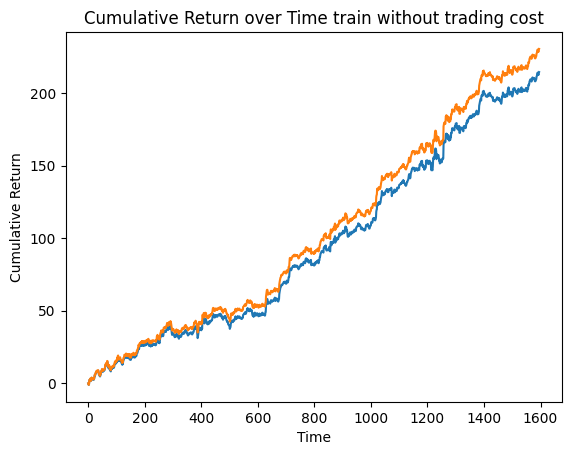

sharpe ratio 1.7594825548301811 test trading cost
total return 40.1015064563183 test trading cost
volitility 1.2606487459619278 test trading cost
drawdown -10.352909021019197 test trading cost
positive rate 0.4912891986062718 test trading cost
1.8854058773832416 test no trading cost


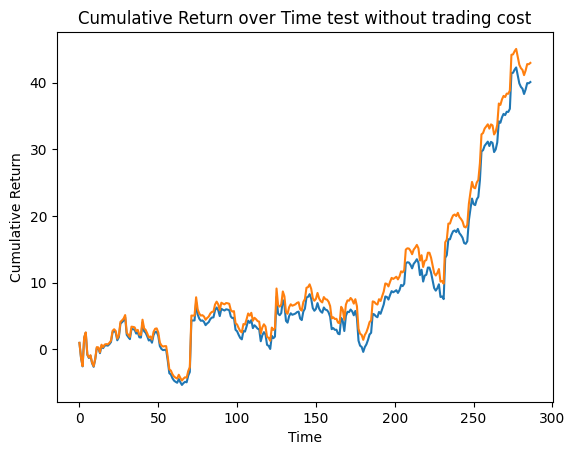

sharpe ratio 0.6511343673762526 valid trading cost
total return 4.74423693369909 valid trading cost
volitility 1.0809665235942425 valid trading cost
drawdown -7.28551004924059 valid trading cost
positive rate 0.5046728971962616 valid trading cost
0.7979891267040842 valid no trading cost


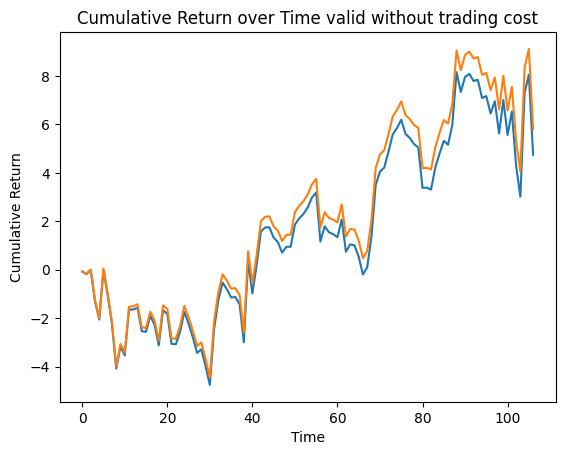

In [40]:
#generate portfolio

def reweight(x,x_mask,pos=1,neg=1):
  #reweighting, can change pos and neg.
  x=x*x_mask
  x_positive=x*(x>0)
  x_negative=x*(x<0)

  x_positive=pos*x_positive/((x_positive.sum(axis=1).reshape(-1,1) )+0.0001)


  x_negative=-neg*x_negative/(x_negative.sum(axis=1).reshape(-1,1)-0.00001)
  return x_positive+x_negative

def cumulative_return(y_pred,y_train_t,trading_cost=False):
  y_return=y_pred*y_train_t
  y_return=np.sum(y_return,axis=1)
  if trading_cost:
      y_return=y_return-0.01

  y_return_cum=np.cumsum(y_return,axis=0)
  return y_return_cum,y_return

actual_stock_size=20

def compute_drawdown(cumulative_returns):

    previous_peaks = np.maximum.accumulate(cumulative_returns)

    drawdown = (cumulative_returns - previous_peaks) / previous_peaks * 100

    return min(drawdown)



def process_plt(y_pred,y_train_t,x_train_t,state):
    x_train_t=x_train_t.reshape(-1,actual_stock_size,seq_len,input_size)


    y_pred=y_pred.reshape(-1,actual_stock_size)

    y_train_t=y_train_t.reshape(-1,actual_stock_size)



    y_pred=reweight(y_pred,x_train_t[:,:,-1,8])

    y_return_cum,y_return=cumulative_return(y_pred,y_train_t,trading_cost=True)

    print("sharpe ratio",math.sqrt(252)*np.mean(y_return)/np.std(y_return),state+' trading cost')
    print("total return",np.sum(y_return),state+' trading cost')
    print("volitility",np.std(y_return),state+' trading cost')
    print("drawdown",compute_drawdown(y_return+100),state+' trading cost')
    print("positive rate",np.mean(y_return>0),state+' trading cost')

    plt.plot(range(len(y_return_cum)),y_return_cum)

    plt.xlabel('Time')
    plt.ylabel('Cumulative Return')
    plt.title('Cumulative Return over Time '+state+' with trading cost')


    y_return_cum,y_return=cumulative_return(y_pred,y_train_t,trading_cost=False)

    print(math.sqrt(252)*np.mean(y_return)/np.std(y_return),state+' no trading cost')

    plt.plot(range(len(y_return_cum)),y_return_cum)

    plt.xlabel('Time')
    plt.ylabel('Cumulative Return')
    plt.title('Cumulative Return over Time '+state+' without trading cost')
    plt.show()
    return
process_plt(y_pred_train,y_train_t_train,x_train_t_train,'train')
process_plt(y_pred_test,y_train_t_test,x_train_t_test,'test')
process_plt(y_pred_valid,y_train_t_valid,x_train_t_valid,'valid')


In [25]:
model_path = "/content/quant_projects/model1.pth"

# Save the model to the specified file path
#torch.save(model.state_dict(), model_path)
model.load_state_dict(torch.load(model_path,map_location=torch.device('cpu')))

<All keys matched successfully>

#GNN
This is the next step to do if time permits. We will be using a graph model to fit the data. The nodes are each stock. The edges are the correlation between stocks.

In [ ]:
threshold_edge=0.5
print(cnn_train_data.shape,cnn_train_target.shape)
train_data_size=cnn_train_data.shape[0]
cov_mat=np.corrcoef(cnn_train_target.T)
print(cov_mat.shape)

print(cnn_train_data.shape)
total_edge=np.sum(cov_mat>threshold_edge)
graph_info=np.ndarray(shape=(total_edge,2))
c=0
number_node=cov_mat.shape[0]
for i in range(number_node):
  for j in range(number_node):
    if cov_mat[i,j]>threshold_edge:
      graph_info[c]=[i,j]
      c+=1
#print(graph_info.shape)
#this also transpose
def form_graph_rep(size_batch):
    graph_info_rep=graph_info.reshape(-1,2)
    for i in range(size_batch-1):
      graph_info_rep=np.append(graph_info_rep,graph_info.reshape(-1,2)+number_node*(i+1),axis=0)
    #print(graph_info_rep,graph_info_rep.shape)
    return np.transpose(graph_info_rep,(1,0))
print(form_graph_rep(3).shape)





'''

graph_info_rep=graph_info.reshape(1,-1,2)
for i in range(train_data_size-1):
  graph_info_rep=np.append(graph_info_rep,graph_info.reshape(1,-1,2),axis=0)


print(graph_info_rep.shape,graph_info_rep[1])
'''





(1178, 109, 30, 20) (1178, 109)
(109, 109)
(1178, 109, 30, 20)
(2, 9861)


'\n\ngraph_info_rep=graph_info.reshape(1,-1,2)\nfor i in range(train_data_size-1):\n  graph_info_rep=np.append(graph_info_rep,graph_info.reshape(1,-1,2),axis=0)\n\n\nprint(graph_info_rep.shape,graph_info_rep[1])\n'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.0.1+cu118.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.0.1+cu118.html
!pip install torch-geometric
!pip install ogb

Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 18.6 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7026 sha256=9a06786639312c8c71544e04bfcedab997766eb9a068c3d307e487c288e2b7d0
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [ ]:
from __future__ import annotations

# from Python standard library
import copy
from pprint import pprint

# third-party libraries
import matplotlib.pyplot as plt
import networkx as nx
from ogb.graphproppred import PygGraphPropPredDataset, Evaluator
import torch
from torch import nn
import torch.nn.functional as F
import torch_geometric as pyg
import torch_geometric.nn as pyg_nn
from torch_geometric.loader import DataLoader
from tqdm.auto import tqdm

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Device: {device}')

/usr/local/lib/python3.10/dist-packages/torch_geometric/typing.py:63: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: libcudart.so.11.0: cannot open shared object file: No such file or directory
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.10/dist-packages/torch_geometric/typing.py:101: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: libcudart.so.11.0: cannot open shared object file: No such file or directory
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "


Device: cuda


In [ ]:
print(cnn_train_data.shape,cnn_train_target.shape)

(1178, 109, 30, 20) (1178, 109)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms


from torch.utils.data import TensorDataset, DataLoader

tensor_x = torch.Tensor(cnn_train_data.reshape(-1,109,600)) # transform to torch tensor
#tensor_g = torch.Tensor(graph_info_rep)
tensor_y = torch.Tensor(cnn_train_target)
print(tensor_x.shape, tensor_y.shape)

my_dataset = TensorDataset(tensor_x,tensor_y) # create your datset
my_dataloader = DataLoader(my_dataset, batch_size=32, shuffle=False)

tensor_x = torch.Tensor(cnn_valid_data.reshape(-1,109,600)) # transform to torch tensor
tensor_y = torch.Tensor(cnn_valid_target)

my_dataset_val = TensorDataset(tensor_x,tensor_y) # create your datset
my_dataloader_val = DataLoader(my_dataset_val, batch_size=32, shuffle=False)
tensor_x = torch.Tensor(cnn_test_data.reshape(-1,109,600)) # transform to torch tensor
tensor_y = torch.Tensor(cnn_test_target)

my_dataset_test = TensorDataset(tensor_x,tensor_y) # create your datset
my_dataloader_test = DataLoader(my_dataset_test, batch_size=32, shuffle=False)

torch.Size([1178, 109, 600]) torch.Size([1178, 109])


In [ ]:


class GAT(torch.nn.Module):
    def __init__(self,
                 node_dim: int,
                 hidden_dim: int,
                 mid_dim:list,
                 num_layers: int,
                 dropout: float):
        """
        Args
        - node_dim: int, dimension of input node features
        - hidden_dim: int, dimensions of hidden layers
        - num_layers: int, # of hidden layers
        - dropout: float, probability of dropout
        """
        super(GAT, self).__init__()

        # save all of the info
        self.node_dim = node_dim
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.dropout = dropout



        # a list of GATv2 layers, with dropout
        self.convs = nn.ModuleList()
        self.bns = nn.ModuleList()
        for l in range(num_layers):
            layer = pyg_nn.GATv2Conv(in_channels=hidden_dim,
                                     out_channels=hidden_dim,add_self_loops=False,
                                     dropout=dropout)
            self.convs.append(layer)
            self.bns.append(nn.BatchNorm1d(hidden_dim))

        # fully-connected final layer
        self.fc1 = nn.Linear(hidden_dim, mid_dim[0])
        self.fc2 = nn.Linear(mid_dim[0], mid_dim[1])
        self.drop1 = nn.Dropout(p=self.dropout)
        self.fc3 = nn.Linear(mid_dim[1], mid_dim[2])


    def forward(self, x ,graph_data,batch) -> torch.Tensor:
        """
        Args
        - data: pyg.data.Batch, a batch of graphs

        Returns: torch.Tensor, shape [batch_size], unnormalized classification
            probability for each graph
        """
        #x, edge_index, edge_attr, batch = (
        #    data.x, data.edge_index, data.edge_attr, data.batch)

        #x = self.atom_encoder(x)
        print(x.shape,"x")

        graph_data=graph_data.to(torch.int64)
        batch=batch.to(torch.int64)

        for l, conv in enumerate(self.convs):
            #print(conv,x.dim(),x.shape,graph_data,graph_data.shape)
            #print(x,x.shape,edge_index,edge_index.shape,edge_attr,edge_attr.shape,batch)
            x = conv(x, graph_data)
            #print(x.shape)
            if l != self.num_layers - 1:
                x = self.bns[l](x)
                x = F.relu(x)
            #break
        #print(x.shape,batch.shape,"nbow")
        print(x.shape,"w")
        x = pyg_nn.global_mean_pool(x, batch=batch)
        print(x.shape,"i")
        x = F.relu(self.fc1(x))
        x = self.drop1(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

In [ ]:
def train(model: nn.Module, device: torch.device | str,
          data_loader: DataLoader, optimizer: torch.optim.Optimizer,
          loss_fn: nn.Module, pbar: tqdm) -> float:
    """Trains a GNN model.

    Args
    - model: nn.Module, GNN model, already placed on device
    - device: torch.device
    - data_loader: pyg.loader.DataLoader
    - optimizer: torch.optim.Optimizer
    - loss_fn: nn.Module

    Returns: (loss, acc)
    - loss: float, average per-graph loss across epoch
    - acc: float, accuracy
    """
    model.train()
    total_loss = 0
    all_preds = []
    all_labels = []

    pbar.reset(len(data_loader))
    pbar.set_description('Training')

    for step,(x_data,target) in enumerate(data_loader):

        batch_size=target.size(dim=0)
        graph_data=torch.Tensor(form_graph_rep(batch_size))
        ''''
        print(batch_size,x_data,target)
        print(number_feature)

        print(np.arange(batch_size))
        print(np.repeat(np.arange(batch_size),number_feature))
        '''
        batch = torch.Tensor(np.repeat(np.arange(batch_size),number_node))
        all_labels.append(target.detach())
        #print(graph_data.shape,"graph")
        batch = batch.to(device)
        x_data = x_data.to(device)
        graph_data = graph_data.to(device)
        target = target.to(device)

        #batch_size = batch.batch.max().item()

        preds = model(x_data,graph_data,batch)
        print(preds.shape)
        all_preds.append(preds.detach().cpu())

        loss = loss_fn(preds, target.to(torch.float32))
        total_loss += loss.item() * batch_size

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        pbar.update()

    all_preds = (torch.cat(all_preds).view(-1) > 0).to(torch.int32)
    all_labels = torch.cat(all_labels).view(-1)
    acc = (all_preds == all_labels).sum() / len(all_labels)
    avg_loss = total_loss / len(all_labels)
    return avg_loss, acc
def eval(model: nn.Module, device: torch.device, loader: DataLoader,
         evaluator: Evaluator, pbar: tqdm) -> dict[str, float]:
    """Evaluates the AUROC of a model on a dataset split.

    Args
    - model: nn.Module, GNN model, already moved to device
    - device: torch.device
    - loader: DataLoader
    - evaluator: Evaluator from OGB
    - pbar: tqdm, progress bar

    Returns: dict, with one (key, value)
    - key is dataset.eval_metric (which in this case is 'rocauc')
    - value is the AUROC
    """
    model.eval()
    y_true = []
    y_pred = []

    pbar.reset(total=len(loader))
    pbar.set_description('Evaluating')

    for step,(x_data,target) in enumerate(loader):
        y_true.append(target.detach())
        batch_size=target.size(dim=0)
        graph_data=torch.Tensor(form_graph_rep(batch_size))

        batch = torch.Tensor(np.repeat(np.arange(batch_size),number_node))

        batch = batch.to(device)
        x_data = x_data.to(device)
        graph_data = graph_data.to(device)
        target = target.to(device)


        #batch_size = batch.batch.max().item()
        with torch.no_grad():

            pred = model(x_data,graph_data,batch)


        y_pred.append(pred.detach().cpu())
        pbar.update()


    all_preds = (torch.cat(y_pred).view(-1) > 0).to(torch.int32)
    all_labels = torch.cat(y_true).view(-1)
    acc = (all_preds == all_labels).sum() / len(all_labels)
    y_true = torch.cat(y_true, dim=0).numpy()
    y_pred = torch.cat(y_pred, dim=0).numpy()

    input_dict = {'y_true': y_true, 'y_pred': y_pred}
    return evaluator.eval(input_dict),acc

In [ ]:
def eval_1(model: nn.Module, device: torch.device, loader: DataLoader,
         evaluator: Evaluator, pbar: tqdm) -> dict[str, float]:
    """Evaluates the AUROC of a model on a dataset split.

    Args
    - model: nn.Module, GNN model, already moved to device
    - device: torch.device
    - loader: DataLoader
    - evaluator: Evaluator from OGB
    - pbar: tqdm, progress bar

    Returns: dict, with one (key, value)
    - key is dataset.eval_metric (which in this case is 'rocauc')
    - value is the AUROC
    """
    model.eval()
    y_true = []
    y_pred = []
    test_total=0
    test_correct=0
    test_loss=0

    pbar.reset(total=len(loader))
    pbar.set_description('Evaluating')

    for step,(x_data,target) in enumerate(loader):
        #y_true.append(target.detach())
        batch_size=target.size(dim=0)
        graph_data=torch.Tensor(form_graph_rep(batch_size))

        batch = torch.Tensor(np.repeat(np.arange(batch_size),number_node))

        batch = batch.to(device)
        x_data = x_data.to(device)
        graph_data = graph_data.to(device)
        target = target.to(device)


        #batch_size = batch.batch.max().item()
        with torch.no_grad():

            pred = model(x_data,graph_data,batch).detach().cpu()
            target= target.detach().cpu()

            _, predicted = torch.max(pred, 1)
            _,labels = torch.max(target,1)

            y_true.append(predicted.detach())
            y_pred.append(labels.detach())



            test_total += labels.size(0)

            test_correct += (predicted == labels).sum().item()
            # find loss
            loss = loss_fn(pred, labels)

            test_loss += loss.item()



        pbar.update()





    #print(test_correct,test_total)
    acc = test_correct/test_total
    score= test_loss/len(loader)



    return acc, score,y_true,y_pred

In [ ]:
model = GAT(node_dim=seq_len,
            hidden_dim=seq_len,
            num_layers=5,
            mid_dim=[40,90,3],
            dropout=0.4)
model = model.to(device)

# use the official OGB evaluator, which will compute AUROC for us
evaluator = Evaluator(name='ogbg-molhiv')
weights = [0.4,0.1,0.5] #[ 1 / number of instances for each class]
class_weights = torch.FloatTensor(weights).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0003)
#loss_fn = nn.CrossEntropyLoss(weight=class_weights)
loss_fn = nn.CrossEntropyLoss()
num_epochs = 300
best_model = None
best_valid_auroc = 0

# track the train/valid AUROC and train loss across epochs of training
train_losses = []
train_sharpe_l = []
valid_sharpe_l = []
test_sharpe_l = []

count=0
pbar = tqdm()

for epoch in range(1, 1 + num_epochs):
    loss, acc = train(model, device, my_dataloader, optimizer, loss_fn, pbar)

    acc_train, score_train,y_true,y_pred = eval_1(model, device, my_dataloader, evaluator, pbar)
    _,_,_,_,train_sharpe,_=sharpe(y_true,return_true_train,y_pred)
    acc_val,score_val,y_true,y_pred = eval_1(model, device, my_dataloader_val, evaluator, pbar)
    _,_,_,_,val_sharpe,_=sharpe(y_true,return_true_valid,y_pred)
    acc_val,score_val,y_true,y_pred = eval_1(model, device, my_dataloader_test, evaluator, pbar)
    _,_,_,_,test_sharpe,_=sharpe(y_true,return_true_nasdaq,y_pred)
    tqdm.write(f'Epoch {epoch:02d}, loss: {loss:.4f}, '
               f'train acc: {100 * acc:.2f}%, '
               f'train sharpe: {train_sharpe:.5f}%, '

               f'valid loss: {score_val:.4f}'
               f'valid acc: {100 * acc_val:.2f}%, '
               f'valid sharpe: {val_sharpe:.5f}%, ')

    train_sharpe_l.append(train_sharpe)
    valid_sharpe_l.append(val_sharpe)
    test_sharpe_l.append(test_sharpe)
    if (2.0<val_sharpe<100 and 2.0<test_sharpe<100) or (2.0<test_sharpe<100 and 4.0<test_sharpe+val_sharpe<100) or (2.0<test_sharpe<100):
      count+=1
      torch.save(model.state_dict(), '/content/model_'+str(count)+'epoche'+str(epoch)+'layer=5_trail3_para_20,90,3'+'.pth')
      y_true_np=turn_to_np(y_true,470).reshape(-1,1)
      y_true_np_l=np.append(y_true_np_l,y_true_np,axis=1)
      print(epoch,test_sharpe )




0it [00:00, ?it/s]

torch.Size([32, 109, 600]) x


AssertionError: 